<font size=20></font>
# Introduction
The sinking Of Titanic is one of the most notorious shipwrdeks in the history .<br> In 1912, during her voyage, the Titanic sank after colliding with an icebergkilling 1502 out of 2224 passenger and crew

<font color ='red'>
Content:
</font>

[1. Load and Check Data](#1)<br>
[2. Variable Description](#2)<br>
[3. Univariate Variable Analysis](#3)<br>
&emsp;[3.1. Categorical Variable Analysis](#4)<br>
&emsp;[3.2 Univariate Variable Analysis](#5)<br>
[4. Basic Data Analysis](#6)<br>
 

In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id='1'></a><br>
#  1. Load and Check Data


In [ ]:
#plt.style.available

In [14]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')
test_PasssengerId=test_df["PassengerId"]

In [15]:
train_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id='2'></a><br>
# 2. Variable Description

1 PassengerId uqnique id number to each passenger<br>
2 Survived live(1) died(0)<br>
3 Pclass passenger class<br>
4 Name <br>
5 Sex <br>
6 Age <br>
7 SibSpb number od siblings/spouse <br>
8 Parch number of parents/children<br>
9 Ticket ticket number<br>
10 Fare amount of money spent on ticket<br>
11 Cabin <br>
12 Embarked <br>

------------------------
 |#| Column        Dtype<br>    
 0   PassengerId      int64 <br>
 1   Survived         int64 <br> 
 2   Pclass           int64  <br>
 3   Name             object <br>
 4   Sex              object <br>
 5   Age              float64<br>
 6   SibSp            int64  <br>
 7   Parch            int64  <br>
 8   Ticket           object <br>
 9   Fare             float64<br>
 10  Cabin            object <br>
 11  Embarked         object <br>
dtypes: float64(2), int64(5), object(5)

In [18]:
#train_df.info()
# liste=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
#        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
# for index,i in enumerate(liste):
#     print (index+1,i,"<br>")

<a id='3'></a><br>
# 3. Univariate Variable Analysis<br>
* Categorical Variable : Survived,Sex,Pclass,Embark,Cabin,Name,Sibsp ,Parch
* Numerical Variable: Age,PassengerId, Fare

<a id='4'></a><br>
> # 3.1. Categorical Variable Analysis<br>


In [21]:
def bar_plot(variable):
    """
    input : variable ex :"sex"
    output : bar plot  value count
    """
    #get feature
    var =train_df[variable]
    #count number of categorical variable
    varValue=var.value_counts()
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequence")
    plt.title(variable)
    plt.show()
    print("{}:\n {}".format(variable,varValue))

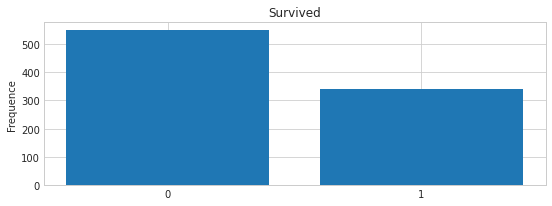

Survived:
 0    549
1    342
Name: Survived, dtype: int64


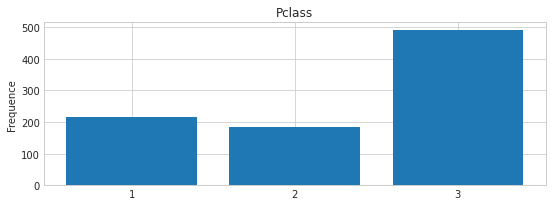

Pclass:
 3    491
1    216
2    184
Name: Pclass, dtype: int64


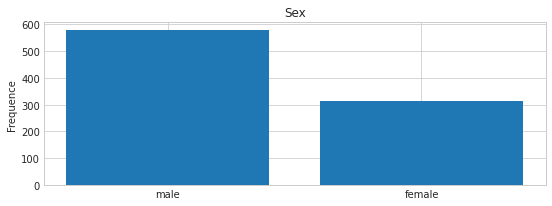

Sex:
 male      577
female    314
Name: Sex, dtype: int64


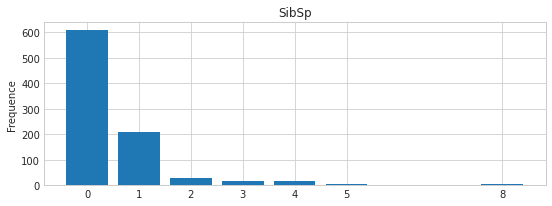

SibSp:
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


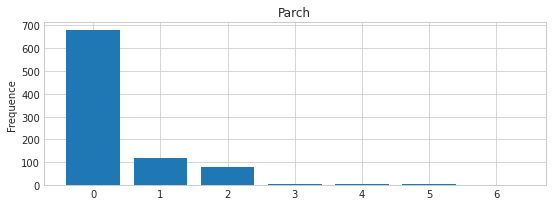

Parch:
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


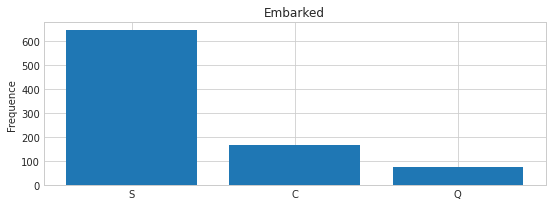

Embarked:
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [23]:

category1=[ 'Survived', 'Pclass','Sex', 'SibSp',
       'Parch', 'Embarked']
for variable in category1:
    bar_plot(variable)
    

In [ ]:
category2=['Name', 'Ticket', 'Cabin' ]
for i in category2:
    print("----{}----\n{} \n".format(i,train_df[i].value_counts()))

#### When variables with multiple categories are plotted, we do not see much meaningful data.
Name ,Ticket,Cabin

In [ ]:
category2=['Name', 'Ticket', 'Cabin' ]
for variable in category2:
    bar_plot(variable)

<a id='5'></a><br>
> # 3.2 Numerical Variable Analysis<br>

In [36]:
def plot_hist(variable):
    """
    input : variable ex :PassengerId"
    output : bar plot  value count
    """
    #get feature
    var=train_df[variable]
    #count number of categorical variable
    varValue=var.value_counts()
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequence")
    plt.title(variable)
    plt.show()
    print("{}:\n {}".format(variable,varValue))



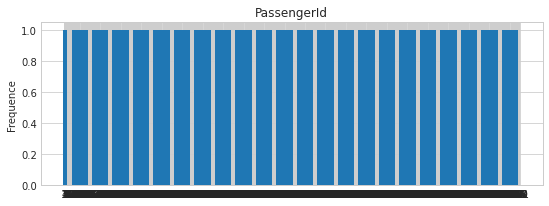

PassengerId:
 1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


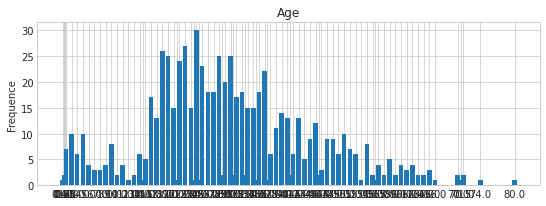

Age:
 24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


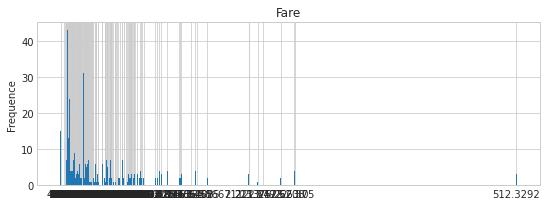

Fare:
 8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


In [37]:
numerical=['PassengerId','Age' ,'Fare']
for variable in numerical:
    plot_hist(variable)

In [104]:
def plot_hisst1(variable):
    plt.figure(figsize=(25,10))
    plt.hist(train_df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequence")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [105]:
# train_df.Fare.plot(kind = 'hist',figsize = (12,12),bins=50)
# plt.xlabel('assengerId')           
# plt.ylabel('frequance')
# plt.title('PassengerId histogram') 


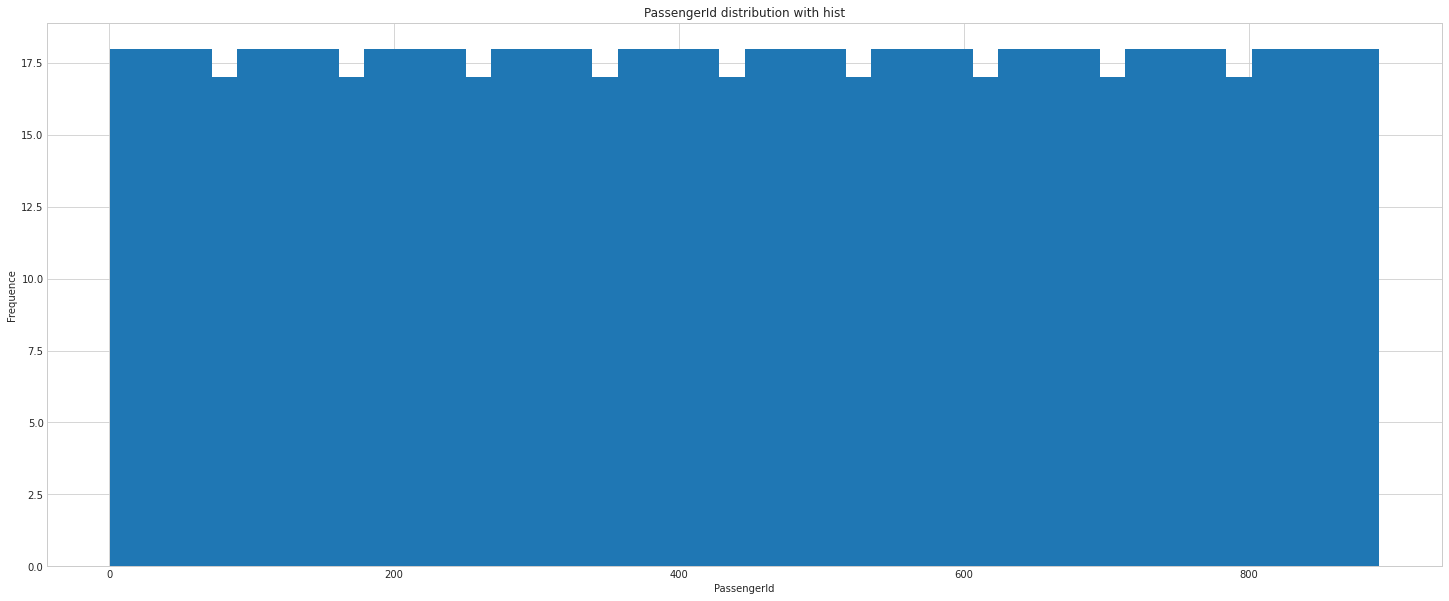

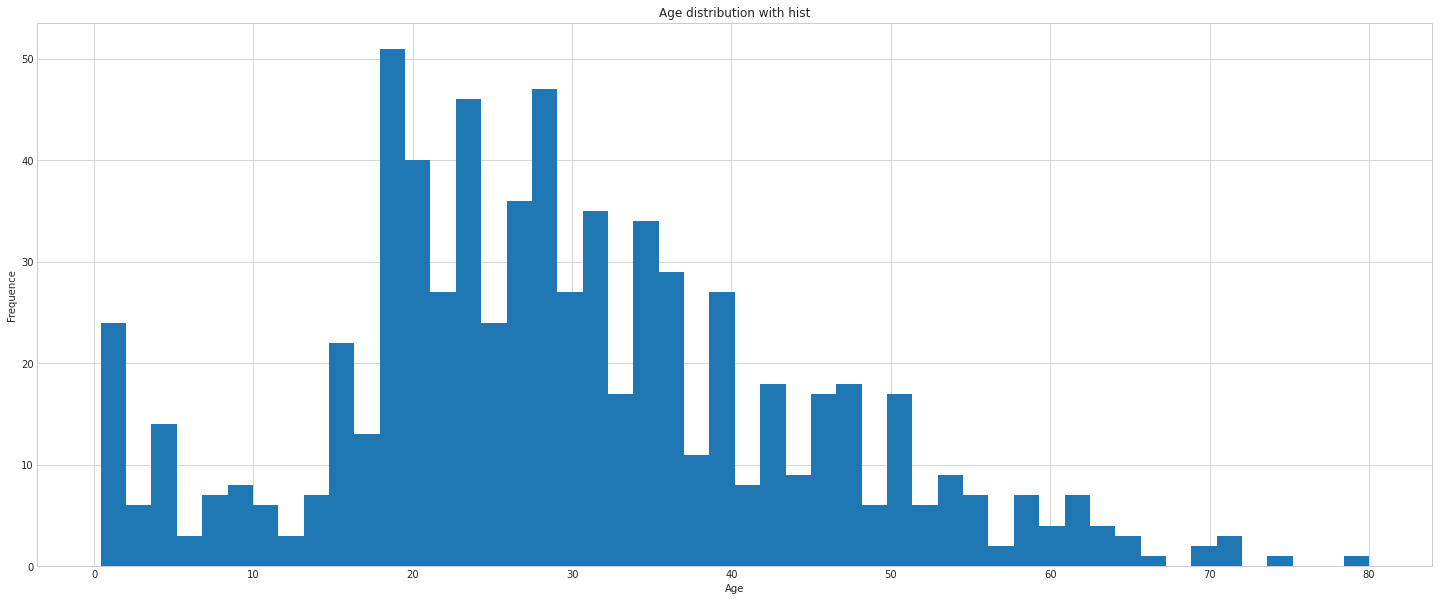

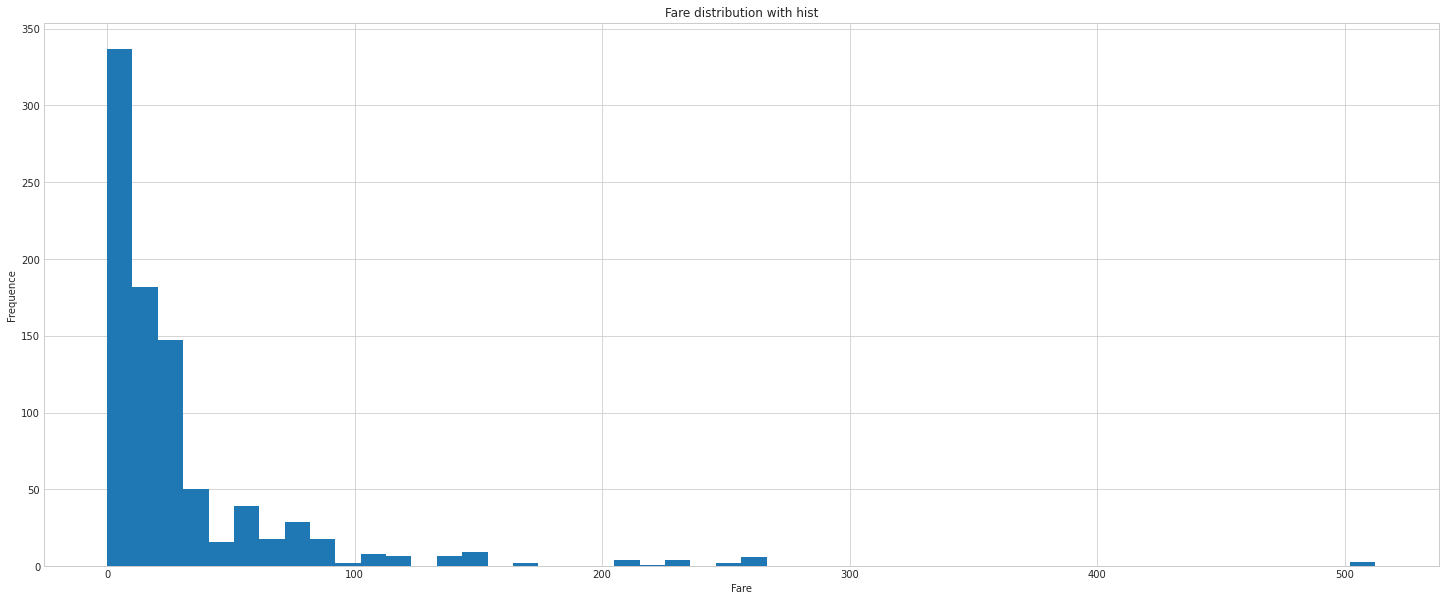

In [106]:
numerical=['PassengerId','Age' ,'Fare']
for variable in numerical:
    plot_hisst1(variable)

array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

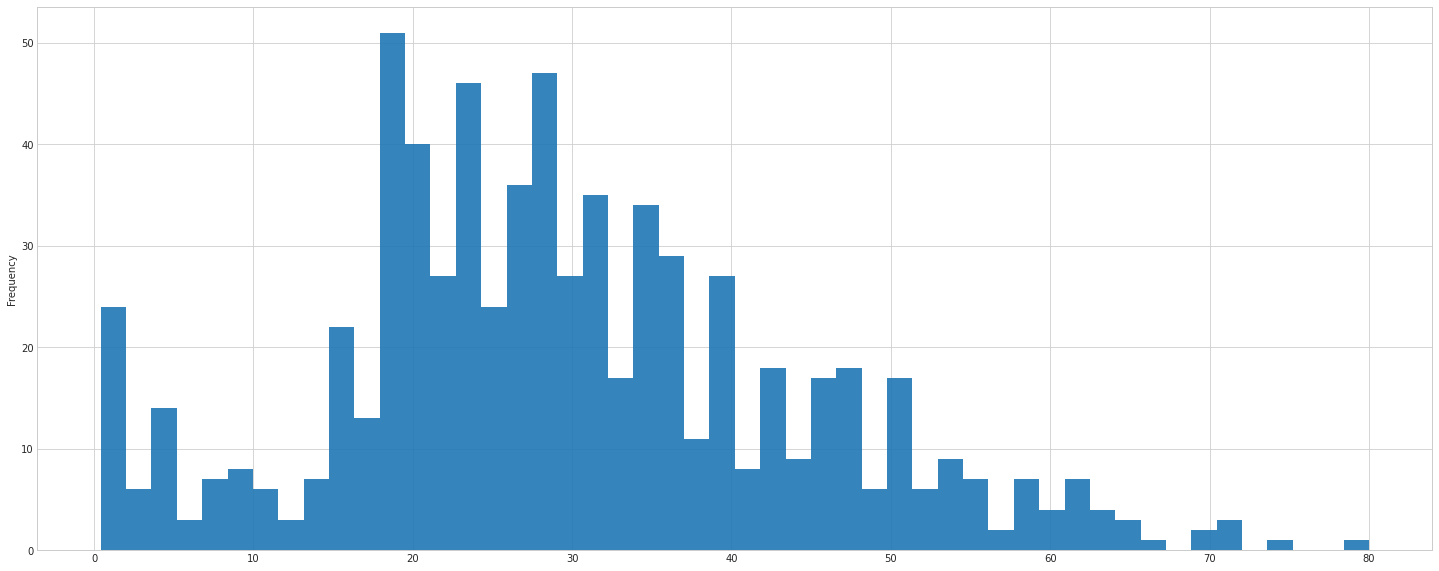

In [86]:
# train_df["Age"].plot(kind = 'hist',grid=True,alpha=0.9,subplots=True,figsize=(25,10),bins=50)


<a id='6'></a><br>
# 4. Basic Data Analysis<br>
* Pclass-Survived
* sex-Survived
* SibSp-Survived
* Parch-Survived


In [148]:
#Pclass-Survived
train_df[["Pclass","Survived","Sex"]].groupby(["Pclass","Sex"],as_index=False).mean().sort_values(by="Survived",ascending=True)

,Pclass,Sex,Survived
5,3,male,0.135447
3,2,male,0.157407
1,1,male,0.368852
4,3,female,0.500000
2,2,female,0.921053
0,1,female,0.968085


In [131]:
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).count().sort_values(by="Survived",ascending=True)

,Pclass,Survived
1,2,184
0,1,216
2,3,491


In [133]:
#"Sex","Survived"
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [138]:
#"Sex","Survived"
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).count().sort_values(by="Survived",ascending=False)

,Sex,Survived
1,male,577
0,female,314


In [139]:
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=True)

,SibSp,Survived
5,5,0.000000
6,8,0.000000
4,4,0.166667
3,3,0.250000
0,0,0.345395
2,2,0.464286
1,1,0.535885


In [143]:
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).count().sort_values(by="Survived",ascending=True)

,SibSp,Survived
5,5,5
6,8,7
3,3,16
4,4,18
2,2,28
1,1,209
0,0,608


In [141]:
train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=True)

,Parch,Survived
4,4,0.000000
6,6,0.000000
5,5,0.200000
0,0,0.343658
2,2,0.500000
1,1,0.550847
3,3,0.600000


In [144]:
train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).count().sort_values(by="Survived",ascending=True)

,Parch,Survived
6,6,1
4,4,4
3,3,5
5,5,5
2,2,80
1,1,118
0,0,678
